In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/bpb/Downloads/DGDG-BG-+glu+glu.csv', header =0)
df


,Time,34:01:00,34:02:00,34:03:00,34:04:00,34:05:00,34:06:00,34:07:00
0,0hr,9.023847e+07,6.487507e+07,256466400.0,1.247920e+07,183714888,1.493737e+08,5.060297e+06
1,12hr,1.050649e+08,1.000832e+08,274600944.0,2.093281e+07,220226004,1.740426e+08,6.043389e+06
2,24hr,1.098706e+08,1.226341e+08,312024192.0,2.363784e+07,201400556,3.033042e+08,1.070980e+07
3,48hr,6.020012e+07,5.371087e+07,187371986.7,6.923127e+06,55805894,8.318979e+07,8.998465e+05


In [3]:
timepoints = df.Time.tolist()
df.drop('Time',axis=1,inplace=True)
lipids = [':'.join(L.split(':')[:2]) for L in df.keys()]

In [4]:
M = df.T.as_matrix()
for i,row in enumerate(M):
    row = row - row.min()
    row = row / row.max()
    M[i] = row


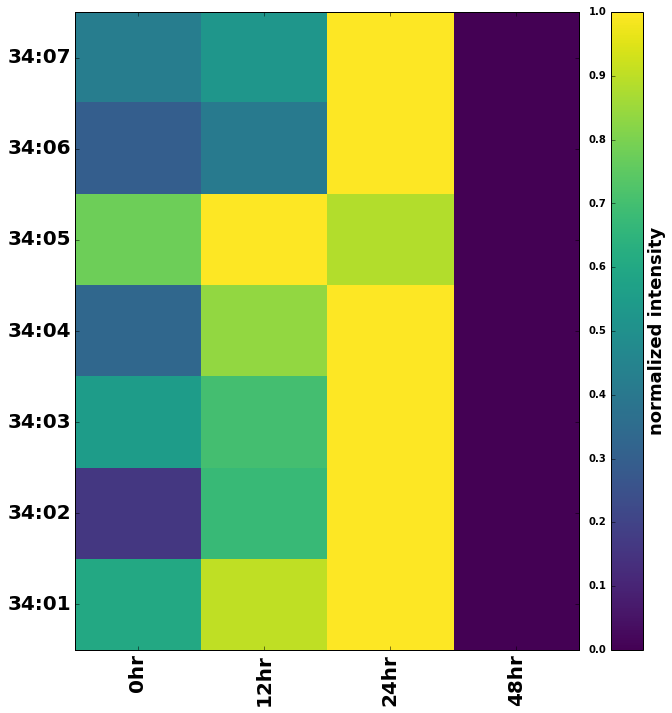

In [5]:
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['lines.linewidth'] = 3

def plot_clustergram_from_matrix(matrix,row_labels,col_labels,colormap):
    fig = plt.figure(figsize=(10,10))
    ax2 = plt.subplot(1,1,1)
    
    a = ax2.imshow(matrix,interpolation='nearest',cmap=colormap,origin='lower')#, extent=[0, 1, 0, 1])
    ax2.set_aspect('auto')
    ax2.set_yticks(range(len(row_labels)))
    ax2.set_yticklabels(row_labels,fontsize=20)
    ax2.set_xticks(range(len(col_labels)))
    ax2.set_xticklabels(col_labels,rotation=90,fontsize=20)#,alignment='left')
    cb = plt.colorbar(a)
    cb.ax.yaxis.set_ticks_position('left')
    cb.set_label('normalized intensity',fontsize=18,fontweight='bold')

    plt.tight_layout()
    plt.show()
#     fig.savefig('y_cf_gc_avg.pdf')
plot_clustergram_from_matrix(M,lipids,timepoints,'viridis')